In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# New Section

In [ ]:
df=pd.read_csv('full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.index

RangeIndex(start=0, stop=4981, step=1)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.size

54791

In [ ]:
df.shape

(4981, 11)

In [ ]:
df.ndim

2

In [ ]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df['heart_disease']=df['heart_disease'].astype(float)

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
print(df.age.value_counts())

0.0    4706
1.0     275
Name: age, dtype: int64


In [ ]:
df.select_dtypes(exclude=[object])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0,1.0,228.69,36.6,1
1,1.0,0,1.0,105.92,32.5,1
2,0.0,0,0.0,171.23,34.4,1
3,0.0,1,0.0,174.12,24.0,1
4,0.0,0,0.0,186.21,29.0,1
...,...,...,...,...,...,...
4976,0.0,0,0.0,70.15,29.8,0
4977,0.0,0,0.0,191.15,31.1,0
4978,0.0,1,0.0,95.02,31.8,0
4979,0.0,0,0.0,83.94,30.0,0


In [ ]:
df.select_dtypes(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Male,Yes,Private,Rural,never smoked
2,Female,Yes,Private,Urban,smokes
3,Female,Yes,Self-employed,Rural,never smoked
4,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
4976,Male,No,Private,Rural,formerly smoked
4977,Male,Yes,Private,Urban,smokes
4978,Female,Yes,Govt_job,Rural,smokes
4979,Male,Yes,Private,Rural,smokes


In [ ]:
df=pd.read_csv('full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
print(np.unique(df['avg_glucose_level']))

[ 55.12  55.22  55.23 ... 267.61 267.76 271.74]


In [ ]:
print(np.unique(df['bmi']))

[14.  14.1 14.2 14.3 14.4 14.5 14.6 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8
 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2
 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6
 19.7 19.8 19.9 20.  20.1 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.
 21.1 21.2 21.3 21.4 21.5 21.6 21.7 21.8 21.9 22.  22.1 22.2 22.3 22.4
 22.5 22.6 22.7 22.8 22.9 23.  23.1 23.2 23.3 23.4 23.5 23.6 23.7 23.8
 23.9 24.  24.1 24.2 24.3 24.4 24.5 24.6 24.7 24.8 24.9 25.  25.1 25.2
 25.3 25.4 25.5 25.6 25.7 25.8 25.9 26.  26.1 26.2 26.3 26.4 26.5 26.6
 26.7 26.8 26.9 27.  27.1 27.2 27.3 27.4 27.5 27.6 27.7 27.8 27.9 28.
 28.1 28.2 28.3 28.4 28.5 28.6 28.7 28.8 28.9 29.  29.1 29.2 29.3 29.4
 29.5 29.6 29.7 29.8 29.9 30.  30.1 30.2 30.3 30.4 30.5 30.6 30.7 30.8
 30.9 31.  31.1 31.2 31.3 31.4 31.5 31.6 31.7 31.8 31.9 32.  32.1 32.2
 32.3 32.4 32.5 32.6 32.7 32.8 32.9 33.  33.1 33.2 33.3 33.4 33.5 33.6
 33.7 33

In [ ]:
cor=df.corr()
cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


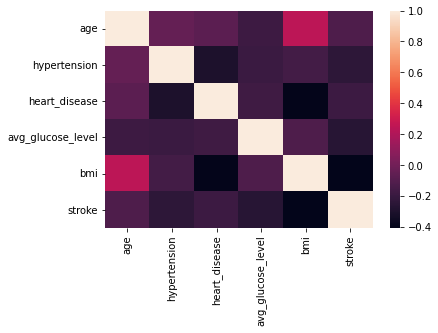

In [ ]:
sns.heatmap(cor.corr())

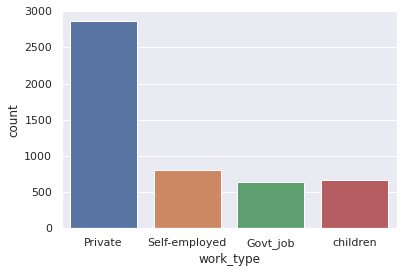

In [ ]:
sns.countplot(x='work_type',data=df)

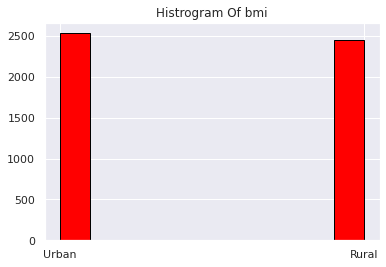

In [ ]:
plt.hist(df['Residence_type'],color='red',edgecolor='black')
plt.title("Histrogram Of bmi")
plt.show()

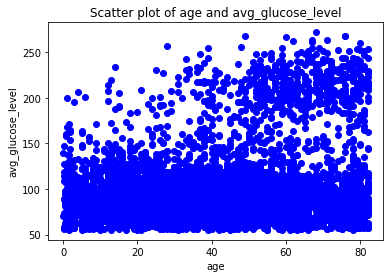

In [ ]:
plt.scatter(df['age'],df['avg_glucose_level'],color='blue')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.title("Scatter plot of age and avg_glucose_level")
plt.show()

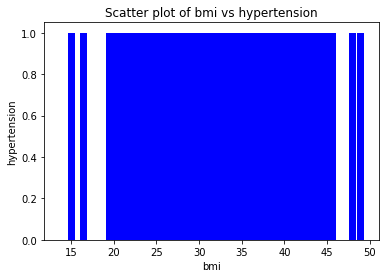

In [ ]:
plt.bar(df['bmi'],df['hypertension'],color='blue')
plt.xlabel('bmi')
plt.ylabel('hypertension')
plt.title("Scatter plot of bmi vs hypertension")
plt.show()

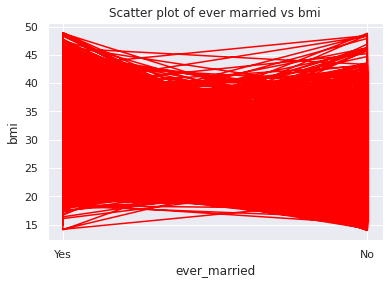

In [ ]:
plt.plot(df['ever_married'],df['bmi'],color='red')
plt.xlabel('ever_married')
plt.ylabel('bmi')
plt.title("Scatter plot of ever married vs bmi")
plt.show()

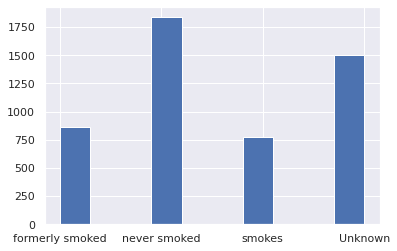

In [ ]:
plt.hist(df['smoking_status'])
plt.show()

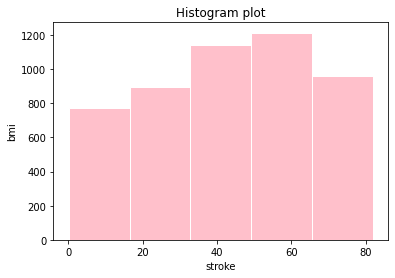

In [ ]:
plt.hist(df['age'],color='pink',edgecolor='white',bins=5)
plt.xlabel('stroke')
plt.ylabel('bmi')
plt.title("Histogram plot")
plt.show()

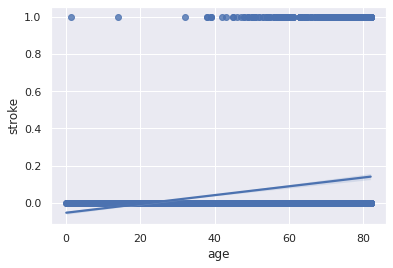

In [ ]:
sns.set(style="darkgrid")
sns.regplot(x=df['age'],y=df['stroke'],fit_reg=True)


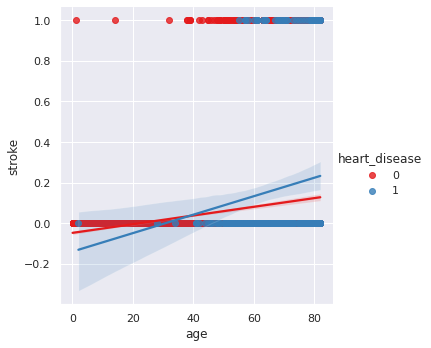

In [ ]:
sns.lmplot(x='age',y='stroke',data=df,fit_reg=True,hue='heart_disease',legend='True',palette="Set1")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


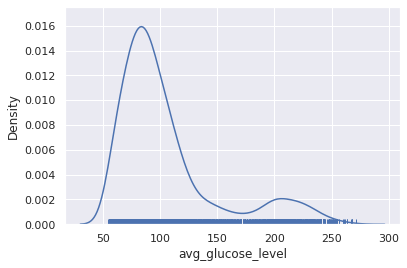

In [ ]:
sns.distplot(df['avg_glucose_level'],rug=True,hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


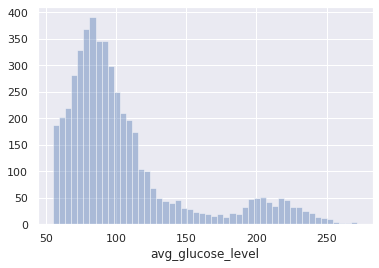

In [ ]:
sns.distplot(df['avg_glucose_level'],kde=False)

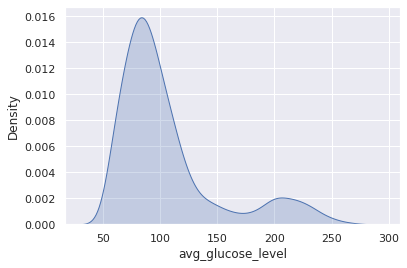

In [ ]:
sns.kdeplot(df['avg_glucose_level'],shade=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


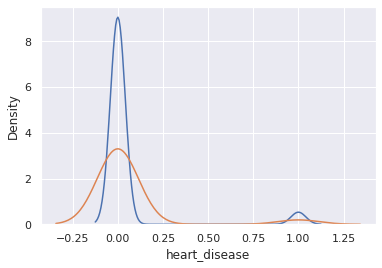

In [ ]:
sns.kdeplot(df['heart_disease'])
sns.kdeplot(df['heart_disease'], bw=.5, label="heart_disease")

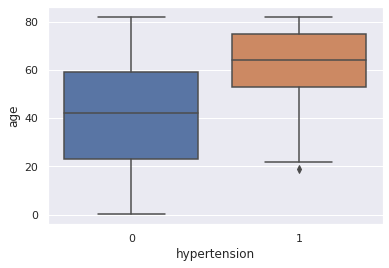

In [ ]:
sns.boxplot(x=df["hypertension"],y=df["age"])

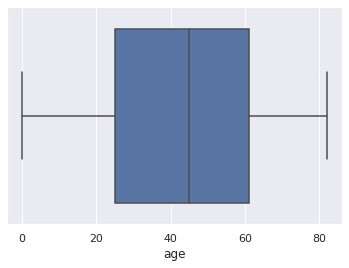

In [ ]:
sns.boxplot(x=df['age'])

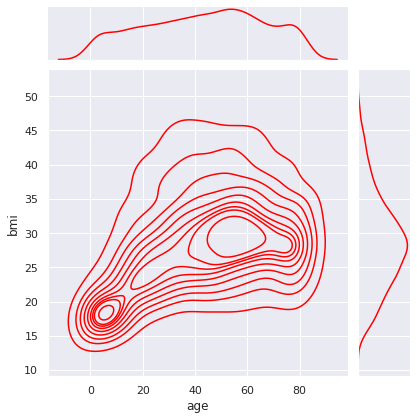

In [ ]:
sns.jointplot(x='age',y='bmi',data=df,kind='kde',color="red")

In [ ]:
df['age'].mean()

43.41985946597069

In [ ]:
df['avg_glucose_level'].mode()

0    93.88
dtype: float64

In [ ]:
df['age'].median()

45.0

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:

df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [ ]:
# Model training and evaluation
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 0.9478260869565217
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

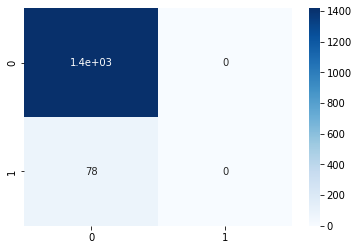

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()